# Decision Trees
A decision tree is a flowchart-like tree structure that can be used as a prediction method by following a decision-making logic. 

The structure of classification and regression trees is a binary tree. A __node__ represents a single input variable (X) and a split point on that variable, assuming the variable is numeric. The __leaf nodes__ (also called terminal nodes) of the tree contain an output variable (y) which is used to make a prediction.

### How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
 * All the tuples belong to the same attribute value.
 * There are no more remaining attributes.
 * There are no more instances.

#### Attribute Selection Measures
Attribute selection measure helps to determine where to split the data at a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute. One of the most popular ASM is __information gain__ which uses the concept of __entropy__. Entropy measures the impurity or randomness of the input set. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on a given atrribute values.

Let's run through an example using a dataset where we are interested in whether a customer is likely to come back within 30 days. 

In [4]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
# Set up all our data in a couple of data frames.
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

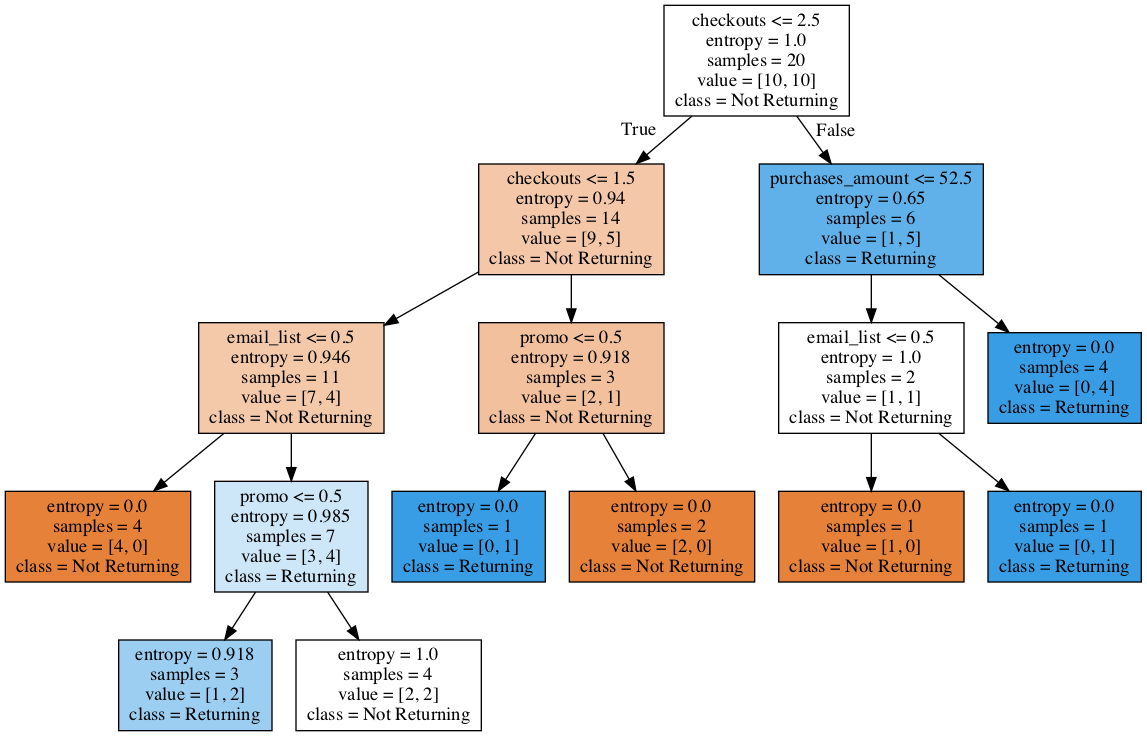

In [3]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(customers, repeat_customer)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the result tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

First,let's try splitting the data before testing and determining the accuracy score. 


In [5]:
# Features and target varaible 

X = customers
y = repeat_customer

In [7]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test


In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5


Here, we have a classification rate of 50%. Let's try to improve this accuracy by tuning the parameters.

# Optimizing Decision Tree Performance

 * __criterion__: optional (default='gini'): This parameter allows us to use the different-different attribute selection measure. 
 * __splitter__: string, optional(default='best') : This parameter allows us to choose the split strategy.
 * __max_depth__: int, or None, optional (default=None): The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting 

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


Decreasing the max depth from 4 to 1 seems to be the only tuning measure to increase the accuracy score from 50% to 75%. 